# Car Price Prediction

In [2]:
#importing the libraries
import numpy as np # numpy used for mathematical operation on array
import pandas as pd # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt # matplotlib used for data visualization
import seaborn as sns # seaborn used for data visualization

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and understanding the data

In [4]:
#Reading the data
cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
#Displaying the first 5 rows
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Displaying the last 5 rows
cars.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
#Shape of the dataset gives the number of rows and columns present
cars.shape

(205, 26)

In [7]:
#Checking for different column present
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
#Checking for data types of different columns present
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
#Info about the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Descriptive Statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
#Descriptive Statistics for categorical variables
cars.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Step 2: Data cleaning and preparation

In [1]:
#Function for finding percentage of missing values in each column
def missing_values_table(data): 
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum()/len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [5]:
missing_values_table(cars)

,Missing Values,% of Total Values
car_ID,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0
wheelbase,0,0.0


**Inference:** Null values absent.

In [14]:
#Looking for no:of unique values in each column
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [14]:
car_name = cars.CarName

In [16]:
# Get the unique values in the CarName column
unique_names = list(car_name.drop_duplicates())

# Print the unique names
print(unique_names)

['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)', 'buick ce

In [17]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
#Diffrent company names present in the column 
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [23]:
# Create an empty list to store the unique values
unique_values = []

# Loop through each element in the data list
for value in cars.CompanyName:
    # If the value is not already in the unique_values list, add it
    if value not in unique_values:
        unique_values.append(value)

In [24]:
print(unique_values)

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo']


In [18]:
#Replacing the repeating brand names
cars = cars.replace('maxda','mazda')
cars = cars.replace('porcshce','porsche')
cars = cars.replace('toyouta','toyota')
cars = cars.replace('vokswagen','volkswagen')
cars = cars.replace('vw','volkswagen')

In [19]:
cars.CompanyName.unique()
#Replaced the values

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [25]:
# Detect Outliers

import collections
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [26]:
cols = cars.select_dtypes([np.int64,np.float64,np.int32]).columns.values.tolist()

In [30]:
outliers = cars.loc[detect_outliers(cars,cols)]
outliers

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
70,71,-1,buick,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
74,75,1,buick,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5
47,48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [20]:
# checking for duplicate rows
duplicate = cars[cars.duplicated()]

In [21]:
duplicate

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**Inference:** No duplicate rows detected.

### Step 3: Data visualization

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

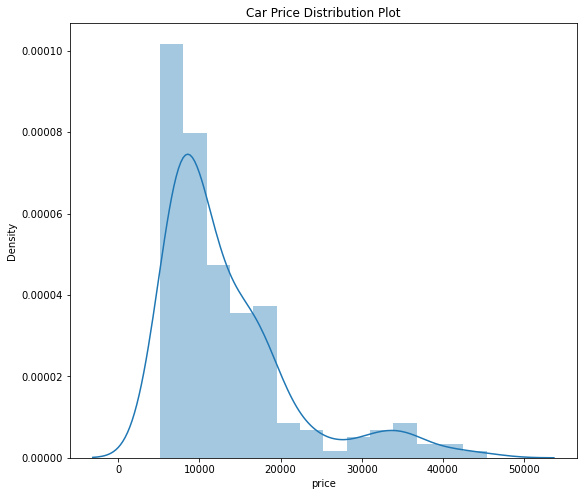

In [23]:
#Distribution plot for price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

**Inference:** Graph skewed towards right =>most car prices are below 20000.

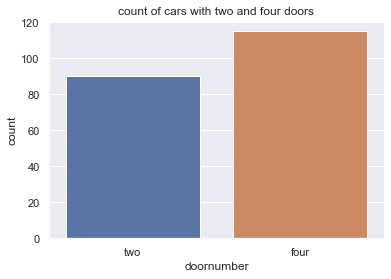

In [24]:
#countplot for doornumber
sns.set_theme(style="darkgrid")
sns.countplot(x ='doornumber', data = cars)
plt.title('count of cars with two and four doors')
 
# Show the plot
plt.show()

**Inference:** Cars with 4 doors are more bought.

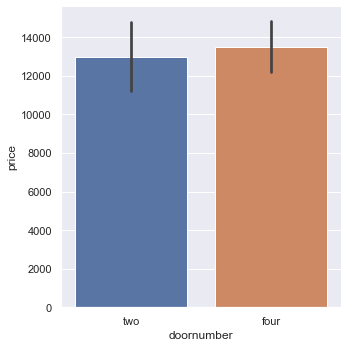

In [25]:
#Price v/s No:of doors
sns.set_theme(style="darkgrid")
sns.catplot(x="doornumber", y="price", kind="bar", data=cars)

**Inference:**Cars with 4 doors are more preferred but no:of doors does not affect the price much.

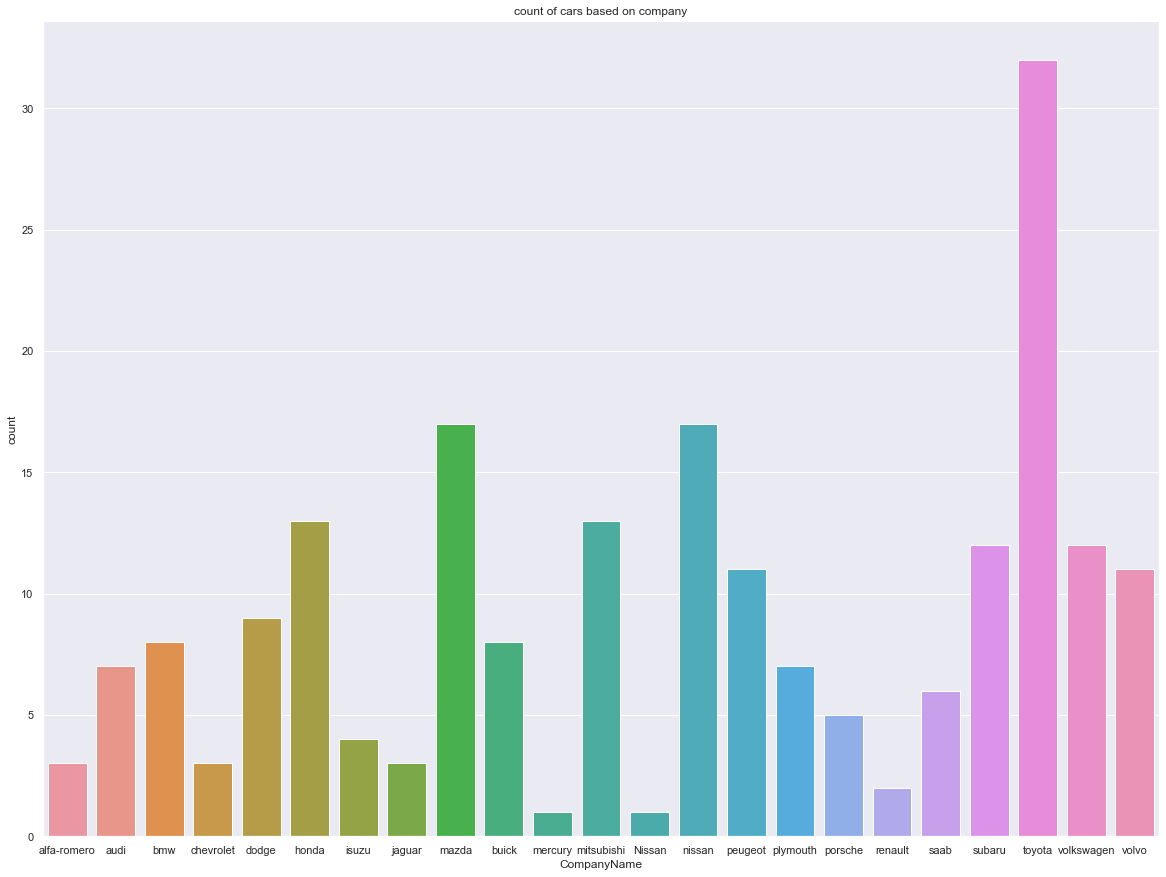

In [26]:
#countplot to understand which companies cars are brought the maximum.
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x ='CompanyName',data = cars,ax=ax )
plt.title('count of cars based on company')

# Show the plot
plt.show()

**Inference:** More cars of company toyota are sold.

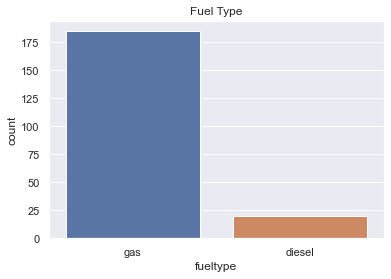

In [29]:
#Countplot for fuel types
sns.set_theme(style="darkgrid")
sns.countplot(x ='fueltype', data = cars)
plt.title('Fuel Type')
plt.show()

**Inference:**More people prefer vehicles run on gas than on diesel.

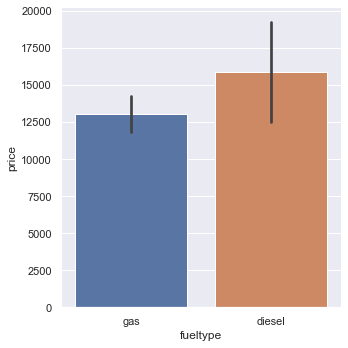

In [30]:
#Fuel price v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="fueltype", y="price", kind="bar", data=cars)

**Inference:** Diesel cars are more expensive.

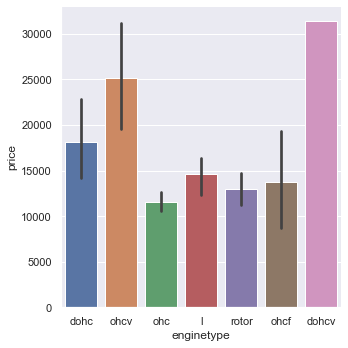

In [31]:
#enginetype v/s price
sns.set_theme(style="darkgrid")
sns.catplot(x="enginetype", y="price", kind="bar", data=cars)

**Inference:** Engine type dohcv is most expensive.

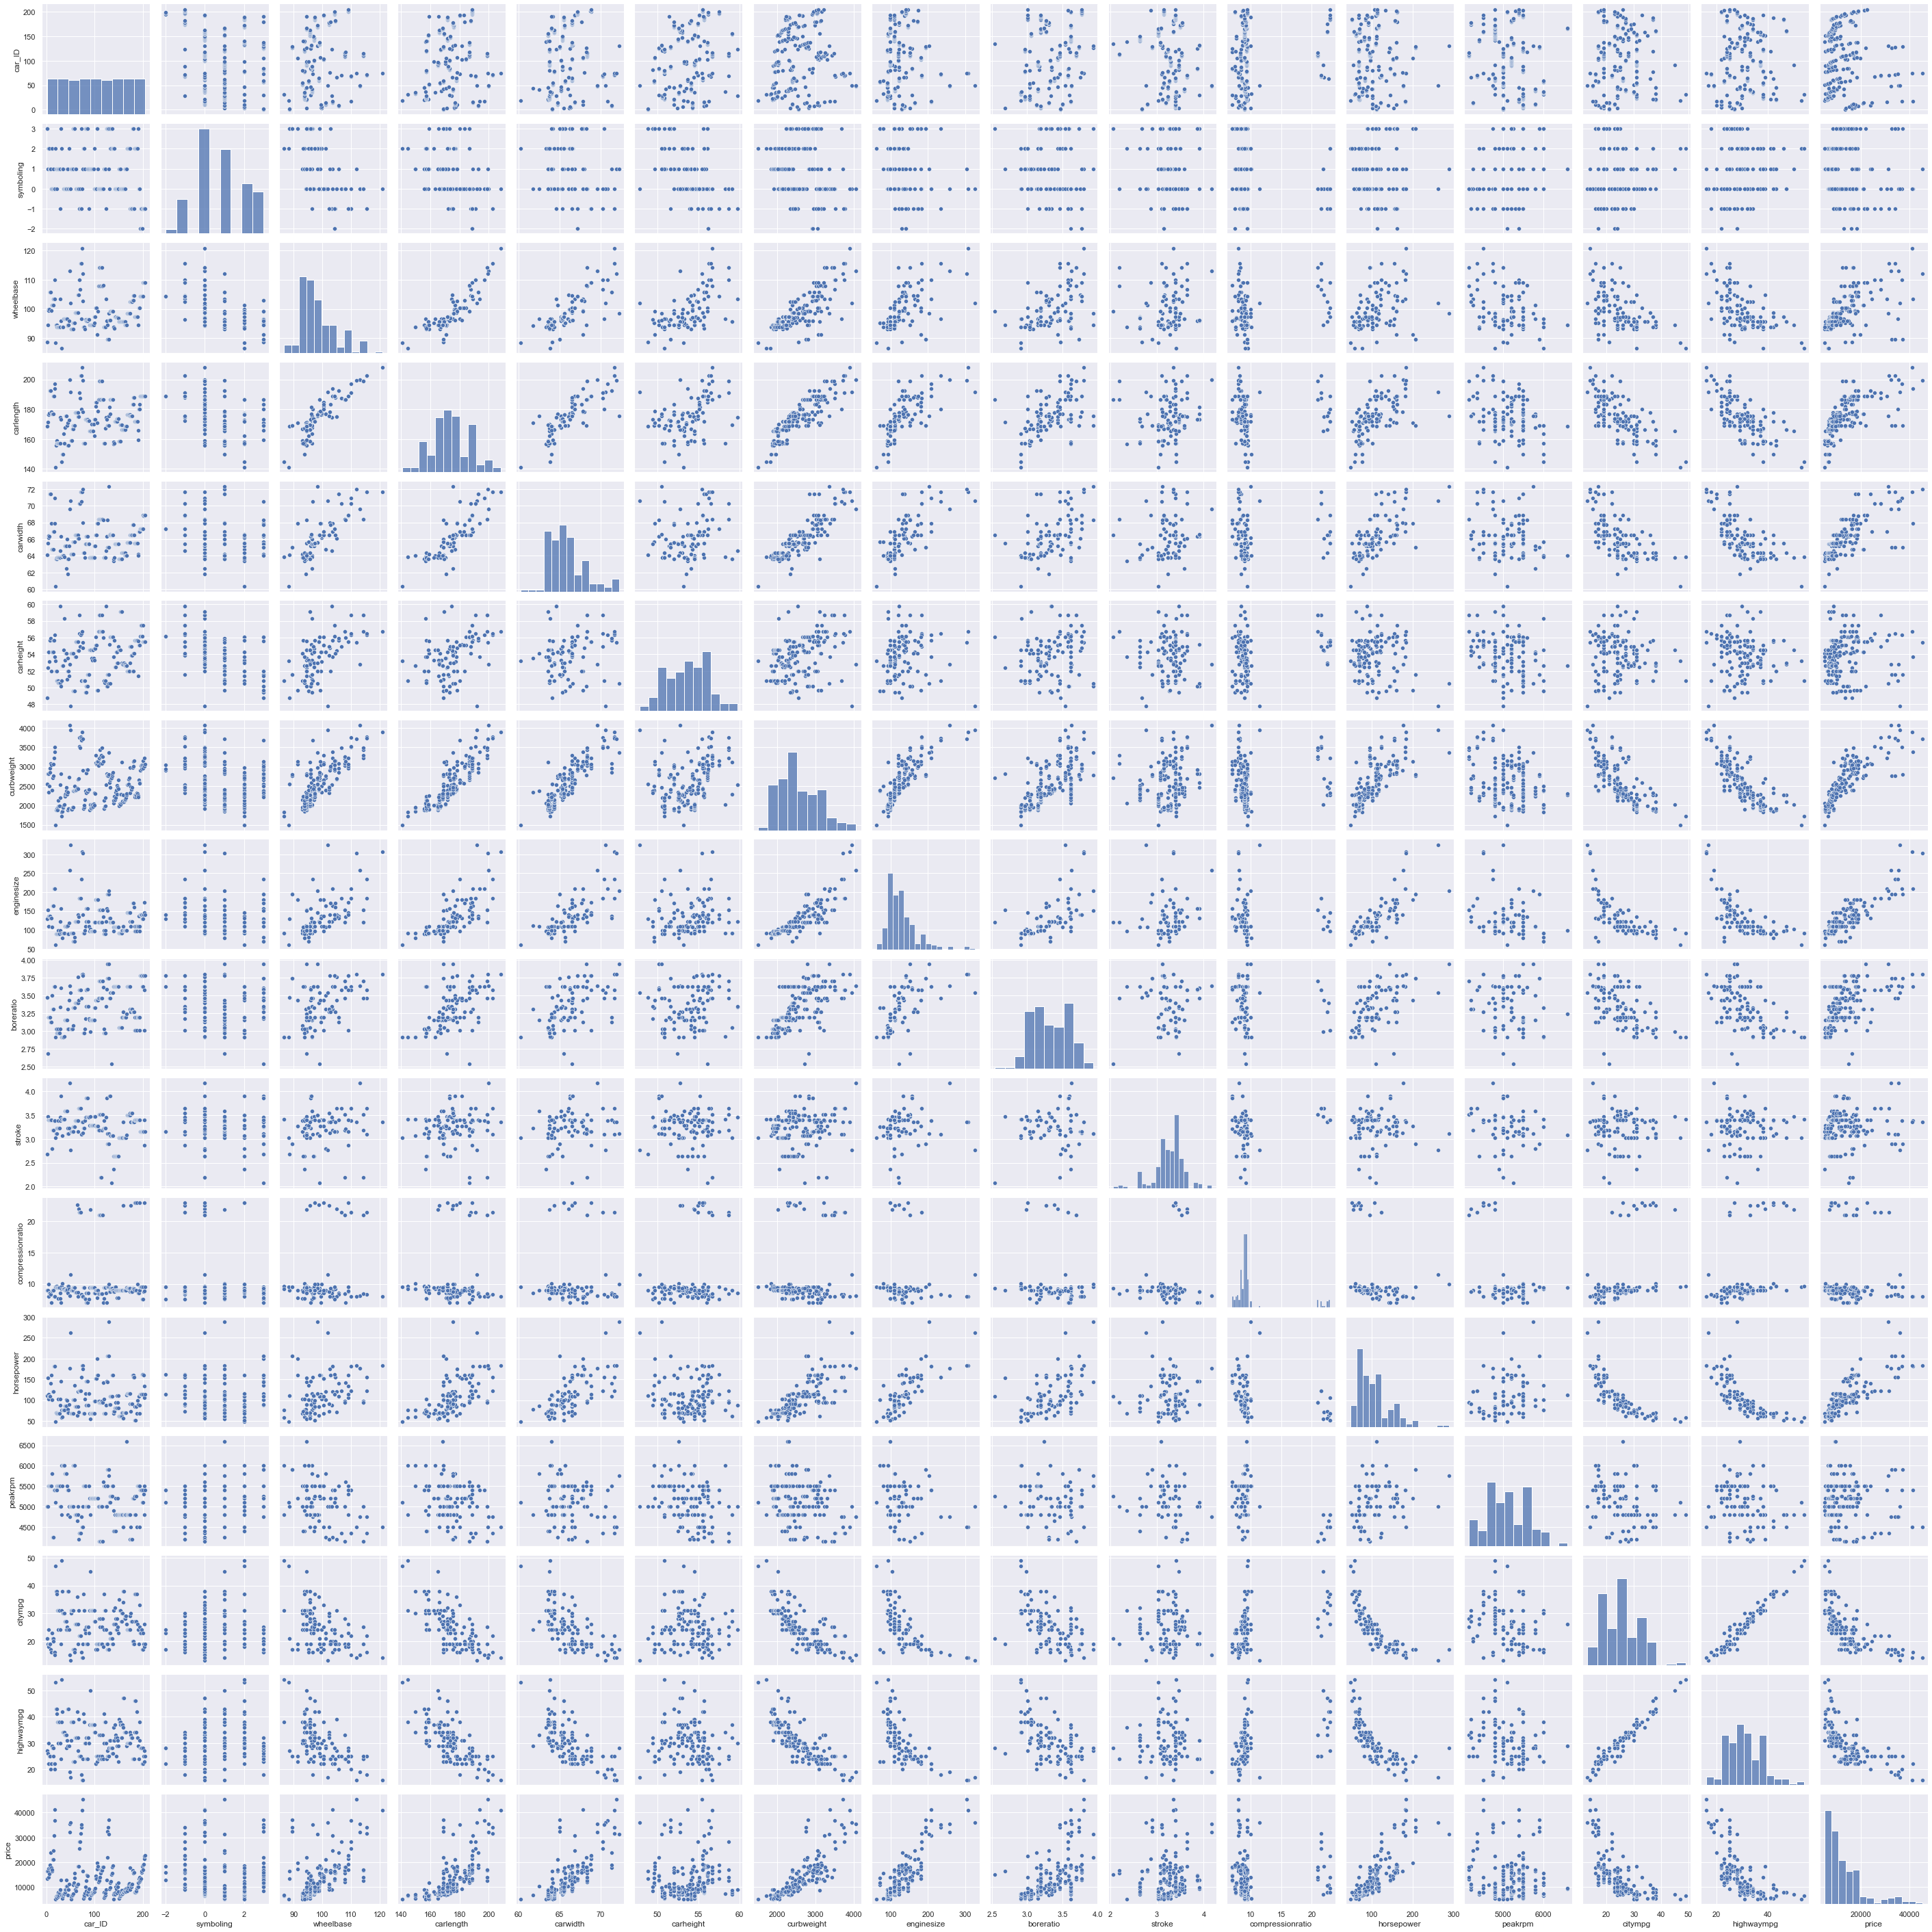

In [32]:
#Correlation pair plot
sns.pairplot(cars)
plt.show()

**Inference:** `wheelbase`,`carlength`,`carwidth`,`carheight`,`curbweight`,`enginesize`,`boreratio`,`horsepower` have a positive correlation with `price`.
`atympg` and `highwaympg` has a negative correlation with `price`.

In [33]:
# Taking the important features for further steps.
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


**Categorical to numerical conversion**

In [34]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [35]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


### Step 3: Input-output split

In [39]:
X = cars_lr[['wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two']]
Y = cars_lr['price']

### Step 4: Test-train split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=1)

### Step 5: Model building

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
#Understanding the best max depth
depth = [];

for i in range(1,8):
    reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = i)
    reg_tree.fit(X_train,y_train)
    yhat = reg_tree.predict(X_test)
    depth.append(r2_score(y_test,yhat))
    print("For max depth = ",i, " : ",r2_score(y_test,yhat))

For max depth =  1  :  0.6224947267329992
For max depth =  2  :  0.8205284134628599
For max depth =  3  :  0.8626812754317926
For max depth =  4  :  0.8830514822628068
For max depth =  5  :  0.904528338328738
For max depth =  6  :  0.9044944703583864
For max depth =  7  :  0.9031575556610314


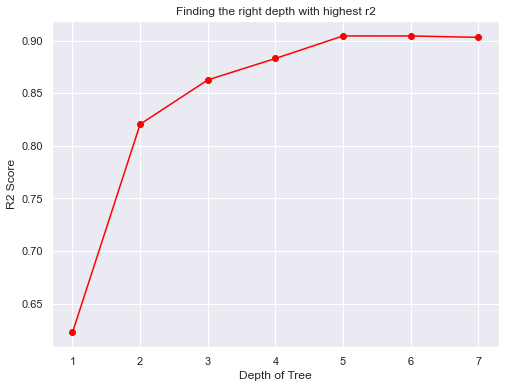

In [43]:
# finding best max depth
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("R2 Score")
plt.title("Finding the right depth with highest r2")
plt.xticks(range(1,8))
plt.show()

**Inference:** r2 maximum when max_depth=5.

In [90]:
# max_depth = 5
reg_tree = DecisionTreeRegressor(criterion="friedman_mse", random_state = 1, max_depth = 5)
reg_tree.fit(X_train,y_train)
yhat = reg_tree.predict(X_test)
print('r2 score:',r2_score(y_test,yhat))
print('MSE:',mean_squared_error(y_test,yhat))

r2 score: 0.904528338328738
MSE: 5394293.4126393795


In [92]:
#trainng score
y_hat = reg_tree.predict(X_train)
r2_train = r2_score(y_train,y_hat)
print('r2 score:',r2_train)
print('MSE:',mean_squared_error(y_train,y_hat))

r2 score: 0.9791917429926973
MSE: 1381878.8183414296


In [113]:
# Hyperparameters range intialization for tuning 
parameters={"criterion":["friedman_mse"],"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,,6,7,8,9],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [84]:
from sklearn.model_selection import GridSearchCV

In [114]:
tuning_model=GridSearchCV(reg_tree,param_grid=parameters)

In [115]:
tuning_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             max_depth=5, random_state=1),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [116]:
# best hyperparameters 
tuning_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [117]:
#new model with best parameters
tuned_hyper_model= DecisionTreeRegressor(criterion="friedman_mse", random_state = 1,max_depth=5,min_samples_leaf=8,splitter='best')

In [118]:
#Fitting the new model
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=8,
                      random_state=1)

In [119]:
# prediction 
tuned_pred=tuned_hyper_model.predict(X_test)

In [120]:
#test scores
print('MSE:',mean_squared_error(y_test, tuned_pred))
print('r2 score:',r2_score(y_test,tuned_pred))

MSE: 8285018.073747584
r2 score: 0.8533664407976469


In [121]:
#trainng score
y_hat_train = tuned_hyper_model.predict(X_train)
r2_train_best = r2_score(y_train,y_hat_train)
print('r2 score:',r2_train_best)
print('MSE:',mean_squared_error(y_train,y_hat_train))

r2 score: 0.934921480530077
MSE: 4321872.204526586


**Inference:** Better scores without hyperparameter tuning.

### Conclusion

In [101]:
# Checking feature importance in the model
reg_tree.feature_importances_

array([0.01578911, 0.21921495, 0.71395481, 0.0040765 , 0.03614264,
       0.        , 0.00656025, 0.        , 0.        , 0.        ,
       0.00097029, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00329146, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

<AxesSubplot:>

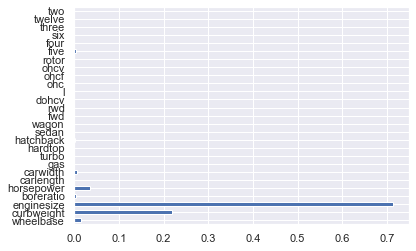

In [102]:
# Visualizing feature importance
(pd.Series(reg_tree.feature_importances_, index=X.columns).plot(kind='barh'))

**Conclusion:** Most mportant feture according to the model is `enginesize`.